In [1]:
from MultiLayerPerceptron import train, Dense, predict_with_layer_value, train_with_max_error, predict
from activation_functions import Sigmoid
from MultiLayerPerceptron import mse, mse_derivative
from utils import fonts_to_bitmap, bitmap_as_matrix, get_config_params, train_different_architectures
from plots import *
from font import fontDict
import numpy as np
import matplotlib.pyplot as plt

# Load fonts

In [2]:
# Load fonts into list of bitmaps
bitmap_dict = fonts_to_bitmap(fontDict)
bitmap_list = list(bitmap_dict.values())  
bitmap_labels = list(bitmap_dict.keys())  


X = np.reshape(bitmap_list,(len(bitmap_list), 35, 1))
Y = np.array(bitmap_labels)

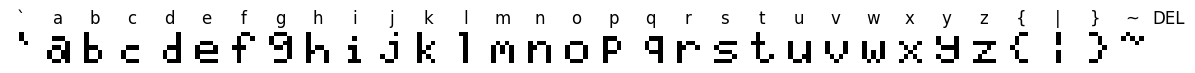

In [3]:
# Reshape each element of X to 7x5
reshaped_X = np.reshape(X, (len(X), 7, 5))

# Create a subplot with 1 row and as many columns as elements in X
fig, axs = plt.subplots(1, len(X), figsize=(12, 6))

# Plot each element of reshaped_X in a separate subplot
for i in range(len(X)):
    axs[i].imshow(reshaped_X[i], cmap='gray_r')
    axs[i].axis('off')
    axs[i].set_title(Y[i])  # Set the title to the corresponding label from Y

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Autoencoder

In [108]:
# Retrieve parameters from config file
learning_rate, max_epochs, bias, beta1, beta2, epsilon, optimizer, activation = get_config_params('ejercicio1A_config.json')

In [5]:
# The latent space is the output of "layer 6"
def autoencoder():
    return [
        Dense(35, 20, optimizer_type=optimizer, learning_rate=learning_rate),
        Sigmoid(),
        Dense(20, 10, optimizer_type=optimizer, learning_rate=learning_rate),
        Sigmoid(),
        Dense(10, 2, optimizer_type=optimizer, learning_rate=learning_rate),
        Sigmoid(),
        Dense(2, 10, optimizer_type=optimizer, learning_rate=learning_rate),
        Sigmoid(),
        Dense(10, 20, optimizer_type=optimizer, learning_rate=learning_rate),
        Sigmoid(),
        Dense(20, 35, optimizer_type=optimizer, learning_rate=learning_rate),
        Sigmoid(),
    ]

#error, epochs = train_with_max_error(autoencoder, mse, mse_derivative, X, X, max_error=0.02, verbose=True)

In [47]:
wrong_dict = {}

def increment_error():
    error_count += 1

def is_same_pixel(pixel1, pixel2):
    return round(pixel1) == round(pixel2)

def compare_bitmaps(input_bitmap, output_bitmap, character, max_wrongs = 1):
    wrongs = 0  
    for i in range(7*5):
        if not is_same_pixel(input_bitmap[i], output_bitmap[i]):
            print(f"Pixel {i} of '{character}' is different: {input_bitmap[i]} != {output_bitmap[i]}")
            wrongs += 1
            global error_count
            error_count += 1
            if wrongs > max_wrongs:
                return False
            wrong_dict[character] = i
    
    return True

['`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', 'DEL']
Trained for 1000 epochs. Error: 0.11980423354390007
Pixel 7 of '`' is different: 1 != 0.4563832949805033
Pixel 32 of '`' is different: 0 != 0.7383893779807694
Error in the reconstruction of character '`'
Pixel 6 of 'a' is different: 1 != 0.004724390995450033
Pixel 7 of 'a' is different: 1 != 0.2770911497064167
Error in the reconstruction of character 'a'
Pixel 13 of 'b' is different: 0 != 0.6743046243528296
Pixel 16 of 'b' is different: 1 != 0.38819265267381803
Error in the reconstruction of character 'b'
Pixel 13 of 'c' is different: 0 != 0.5314266964763671
Pixel 16 of 'c' is different: 1 != 0.36007682401648294
Error in the reconstruction of character 'c'
Pixel 4 of 'd' is different: 1 != 4.6797244286066906e-05
Pixel 9 of 'd' is different: 1 != 0.34081485362499164
Error in the reconstruction of character 'd'
Pixel 10 of 'e' 

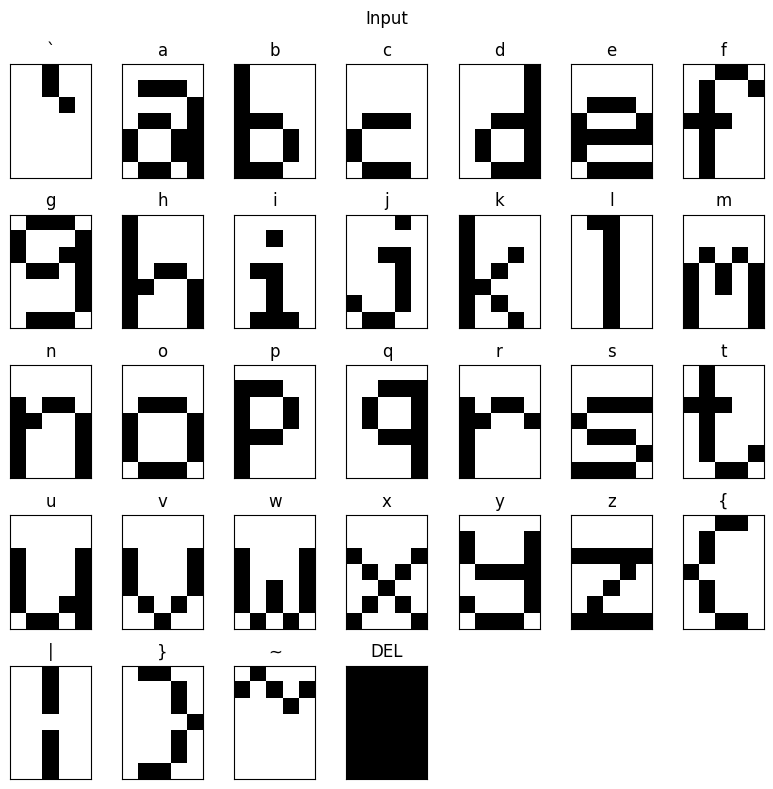

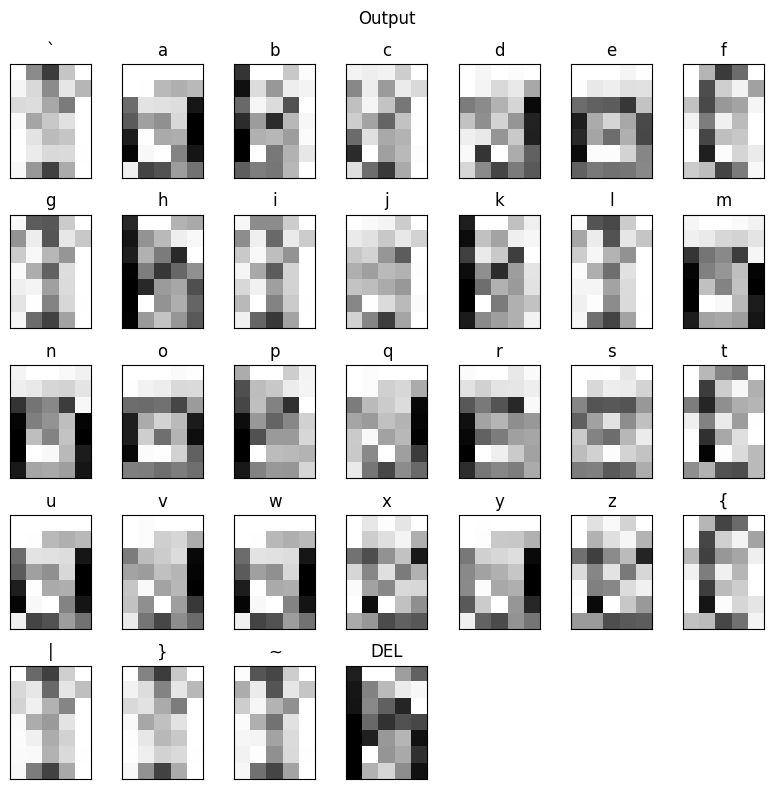

In [48]:
characters = list(bitmap_dict.keys())
print(characters)

epochs = 1000
error_count = 0
#max_error = 0.02

#print(f"Training with a maximum allowed error of {max_error}")
autoencoder = autoencoder()
error = train(autoencoder, mse, mse_derivative, X, X, epochs=epochs, verbose=False)
print(f"Trained for {epochs} epochs. Error: {error[-1]}")

latent_spaces = []
raw_latent_spaces = []
input_matrix_list = []
output_matrix_list = []
correct = 0

for character in range(len(characters)):
    input_bitmap = []
    output_bitmap = []

    # X is a list of lists of -lists with a single element-
    for i in range(len(X[character])):
        input_bitmap.append(X[character][i][0])
    input_matrix_list.append(bitmap_as_matrix(input_bitmap))

    # The latent space is the output of "layer 8"
    outputs, raw_latent_space = predict_with_layer_value(autoencoder, X[character], 6)
    raw_latent_spaces.append(raw_latent_space)
    latent_spaces.append((raw_latent_space[0][0], raw_latent_space[1][0]))

    for output in outputs:
        output_bitmap.append(output[0])

    if not compare_bitmaps(input_bitmap, output_bitmap, characters[character]):
        print(f"Error in character '{characters[character]}'")
    else:
        correct += 1
    
    output_matrix_list.append(bitmap_as_matrix(output_bitmap))

# if(correct == len(characters)):
#     break

#epochs += 1000 # Train for 200 more epochs
#max_error *= 0.9 # Reduce the maximum allowed error by 10%

plot_bitmap_matrix_2(input_matrix_list, characters, "Input")
plot_bitmap_matrix_2(output_matrix_list, characters, "Output")

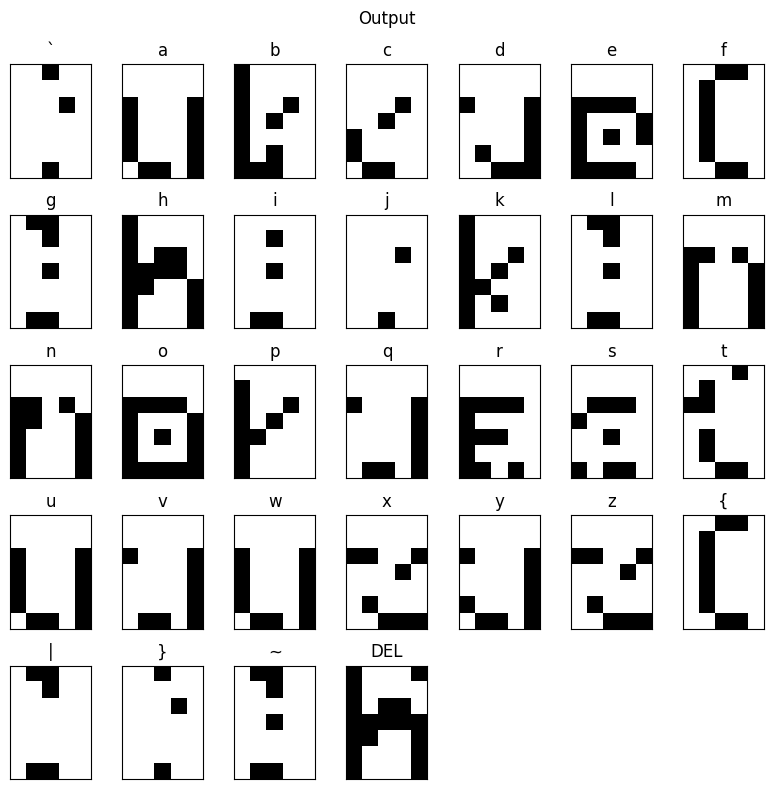

In [49]:
plot_bitmap_matrix_2(np.round(output_matrix_list), characters, "Output")

In [50]:
error_count

62

In [11]:
a = input_matrix_list
b = np.round(output_matrix_list)

np.where(a != b)[0]

array([ 1,  3,  4,  4,  4,  5,  6,  7,  9, 10, 10, 12, 13, 13, 13, 15, 17,
       22, 22, 23, 23, 27, 28, 30, 30, 31])

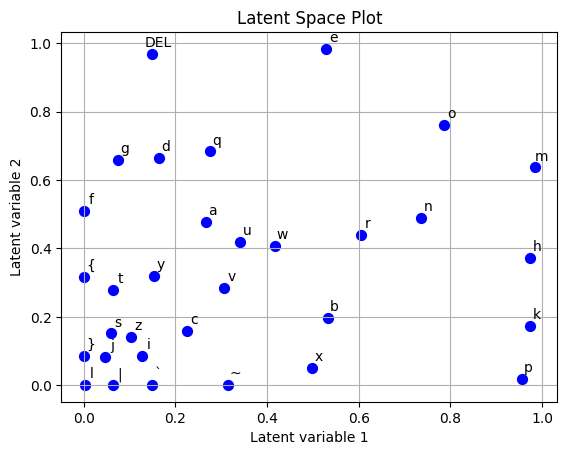

In [138]:
plot_latent_spaces(latent_spaces, characters)

In [ ]:
"""
# The latent space is the output of "layer 6"
def generate_autoencoder_bottlenecks(bottleneck_size):
    return [
        Dense(35, 16, optimizer_type=optimizer, learning_rate=learning_rate),
        Sigmoid(),
        Dense(16, 8, optimizer_type=optimizer, learning_rate=learning_rate),
        Sigmoid(),
        Dense(8, bottleneck_size, optimizer_type=optimizer, learning_rate=learning_rate),
        Sigmoid(),
        Dense(bottleneck_size, 8, optimizer_type=optimizer, learning_rate=learning_rate),
        Sigmoid(),
        Dense(8, 16, optimizer_type=optimizer, learning_rate=learning_rate),
        Sigmoid(),
        Dense(16, 35, optimizer_type=optimizer, learning_rate=learning_rate),
        Sigmoid(),
    ]

#error, epochs = train_with_max_error(autoencoder, mse, mse_derivative, X, X, max_error=0.02, verbose=True)

error_count_list = []
bottlenecks = np.arange(1, 9)

for bottleneck in bottlenecks:
    characters = list(bitmap_dict.keys())
    print(characters)

    epochs = 5000
    #max_error = 0.02

    #print(f"Training with a maximum allowed error of {max_error}")
    autoencoder = generate_autoencoder()
    error = train(autoencoder, mse, mse_derivative, X, X, epochs=epochs, verbose=False)
    print(f"Trained for {epochs} epochs. Error: {error[-1]}")

    latent_spaces = []
    raw_latent_spaces = []
    input_matrix_list = []
    output_matrix_list = []
    correct = 0
    error_count = 0

    for c in range(len(characters)):
        input_bitmap = []
        output_bitmap = []

        # X is a list of lists of -lists with a single element-
        for i in range(len(X[c])):
            input_bitmap.append(X[c][i][0])
        input_matrix_list.append(bitmap_as_matrix(input_bitmap))

        # The latent space is the output of "layer 8"
        outputs, raw_latent_space = predict_with_layer_value(autoencoder, X[c], 6)
        raw_latent_spaces.append(raw_latent_space)
        latent_spaces.append((raw_latent_space[0][0], raw_latent_space[1][0]))

        for output in outputs:
            output_bitmap.append(output[0])

        if not compare_bitmaps(input_bitmap, output_bitmap, characters[c]):
            print(f"Error in the reconstruction of character '{characters[c]}'")
            error_count += 1
        else:
            correct += 1
        
        output_matrix_list.append(bitmap_as_matrix(output_bitmap))
    error_count_list.append(error_count)
    # if(correct == len(characters)):
    #     break

    #epochs += 1000 # Train for 200 more epochs
    #max_error *= 0.9 # Reduce the maximum allowed error by 10%

    plot_bitmap_matrix_2(input_matrix_list, characters, "Original Characters")
    plot_bitmap_matrix_2(output_matrix_list, characters, "Predicted Characters")
"""

'\n# The latent space is the output of "layer 6"\ndef generate_autoencoder_bottlenecks(bottleneck_size):\n    return [\n        Dense(35, 16, optimizer_type=optimizer, learning_rate=learning_rate),\n        Sigmoid(),\n        Dense(16, 8, optimizer_type=optimizer, learning_rate=learning_rate),\n        Sigmoid(),\n        Dense(8, bottleneck_size, optimizer_type=optimizer, learning_rate=learning_rate),\n        Sigmoid(),\n        Dense(bottleneck_size, 8, optimizer_type=optimizer, learning_rate=learning_rate),\n        Sigmoid(),\n        Dense(8, 16, optimizer_type=optimizer, learning_rate=learning_rate),\n        Sigmoid(),\n        Dense(16, 35, optimizer_type=optimizer, learning_rate=learning_rate),\n        Sigmoid(),\n    ]\n\n#error, epochs = train_with_max_error(autoencoder, mse, mse_derivative, X, X, max_error=0.02, verbose=True)\n\nerror_count_list = []\nbottlenecks = np.arange(1, 9)\n\nfor bottleneck in bottlenecks:\n    characters = list(bitmap_dict.keys())\n    print(cha

In [53]:
epochs = 1000
epoch_list = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
error_count_list = []

for epochs in epoch_list:
    error_count = 0
    autoencoder = autoencoder()
    error = train(autoencoder, mse, mse_derivative, X, X, epochs=epochs, verbose=False)
    print(f"Trained for {epochs} epochs. Error: {error[-1]}")

    latent_spaces = []
    raw_latent_spaces = []
    input_matrix_list = []
    output_matrix_list = []
    correct = 0

    for character in range(len(characters)):
        input_bitmap = []
        output_bitmap = []

        # X is a list of lists of -lists with a single element-
        for i in range(len(X[character])):
            input_bitmap.append(X[character][i][0])
        input_matrix_list.append(bitmap_as_matrix(input_bitmap))

        # The latent space is the output of "layer 8"
        outputs, raw_latent_space = predict_with_layer_value(autoencoder, X[character], 6)
        raw_latent_spaces.append(raw_latent_space)
        latent_spaces.append((raw_latent_space[0][0], raw_latent_space[1][0]))

        for output in outputs:
            output_bitmap.append(output[0])

        if not compare_bitmaps(input_bitmap, output_bitmap, characters[character]):
            print(f"Error in the reconstruction of character '{characters[character]}'")
        else:
            correct += 1
        
        output_matrix_list.append(bitmap_as_matrix(output_bitmap))
    error_count_list.append(error_count)


Trained for 1000 epochs. Error: 0.12829350087112318
Pixel 1 of '`' is different: 0 != 0.5430191695592989
Pixel 13 of '`' is different: 1 != 0.4634648224513487
Error in the reconstruction of character '`'
Pixel 6 of 'a' is different: 1 != 0.00014752737470285246
Pixel 7 of 'a' is different: 1 != 0.33661370921440165
Error in the reconstruction of character 'a'
Pixel 0 of 'b' is different: 1 != 0.00015279731573748884
Pixel 5 of 'b' is different: 1 != 0.2557963315444137
Error in the reconstruction of character 'b'
Pixel 13 of 'c' is different: 0 != 0.5662665411599791
Pixel 16 of 'c' is different: 1 != 0.435434307416064
Error in the reconstruction of character 'c'
Pixel 4 of 'd' is different: 1 != 0.21082922275531432
Pixel 9 of 'd' is different: 1 != 0.279357106660438
Error in the reconstruction of character 'd'
Pixel 11 of 'e' is different: 1 != 0.2100052742024873
Pixel 21 of 'e' is different: 1 != 0.46410594890053425
Error in the reconstruction of character 'e'
Pixel 12 of 'f' is different

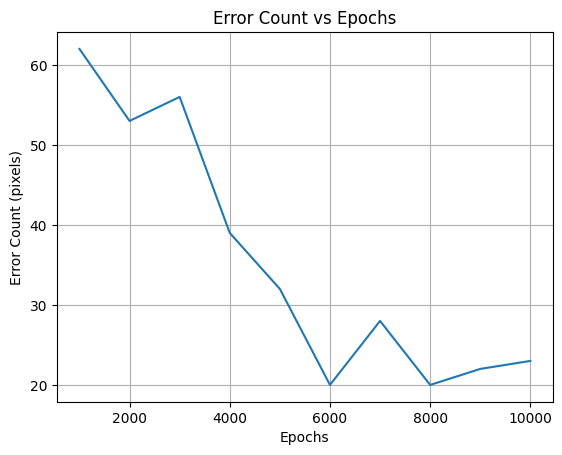

In [55]:
plt.plot(epoch_list, error_count_list)
plt.xlabel('Epochs')
plt.ylabel('Error Count (pixels)')
plt.title('Error Count vs Epochs')
plt.grid()
plt.show()

In [82]:
# Create autoencoder
def autoencoder_architecture1():
    return [
        Dense(35, 20, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
        Dense(20, 10, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
        Dense(10, 2, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
        Dense(2, 10, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
        Dense(10, 20, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
        Dense(20, 35, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
    ]

# Create autoencoder
def autoencoder_architecture2():
    return [
        Dense(35, 15, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
        Dense(15, 2, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
        Dense(2, 15, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
        Dense(15, 35, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
    ]

# Create autoencoder
def autoencoder_architecture3():
    return [
        Dense(35, 30, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
        Dense(30, 20, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
        Dense(20, 10, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
        Dense(10, 2, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
        Dense(2, 10, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
        Dense(10, 20, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
        Dense(20, 30, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
        Dense(30, 35, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
    ]

# Create autoencoder
def autoencoder_architecture4():
    return [
        Dense(35, 2, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
        Dense(2, 2, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
        Dense(2, 35, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
    ]

# Create autoencoder
def autoencoder_architecture5():
    return [
        Dense(35, 30, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
        Dense(30, 25, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
        Dense(25, 20, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
        Dense(20, 15, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
        Dense(15, 10, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
        Dense(10, 5, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
        Dense(5, 2, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
        Dense(2, 10, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
        Dense(10, 15, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
        Dense(15, 20, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
        Dense(20, 25, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
        Dense(25, 30, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid(),
        Dense(30, 35, optimizer_type=optimizer, learning_rate=learning_rate), Sigmoid()
    ]
[35, 30, 25, 20, 15, 10, 5, 2, 5, 10, 15, 20, 25, 30, 35]

['`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', 'DEL']
Trained for 15000 epochs. Error: 0.022323469050071102
Pixel 6 of 'a' is different: 1 != 2.1399534594309158e-10
Pixel 7 of 'a' is different: 1 != 2.477713494787632e-16
Error in the reconstruction of character 'a'
Pixel 23 of 'b' is different: 1 != 1.5405174521874251e-13
Pixel 10 of 'c' is different: 0 != 0.9999999999988531
Pixel 29 of 'e' is different: 0 != 1.0
Pixel 32 of 'f' is different: 0 != 0.9999999999999785
Pixel 18 of 'h' is different: 1 != 7.176170223071017e-12
Pixel 18 of 'j' is different: 1 != 3.280290973655186e-19
Pixel 25 of 'j' is different: 1 != 1.7159667333058532e-23
Error in the reconstruction of character 'j'
Pixel 7 of 'q' is different: 1 != 1.4122349048771718e-23
Pixel 32 of 'q' is different: 0 != 0.9999999999999931
Error in the reconstruction of character 'q'
Pixel 30 of 's' is different: 1 != 4.5702276209

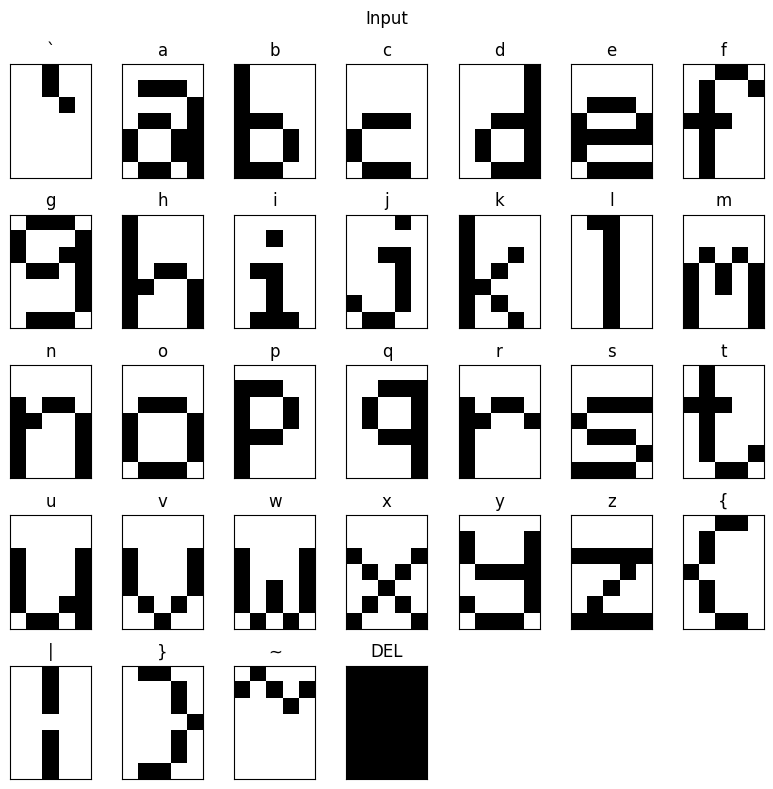

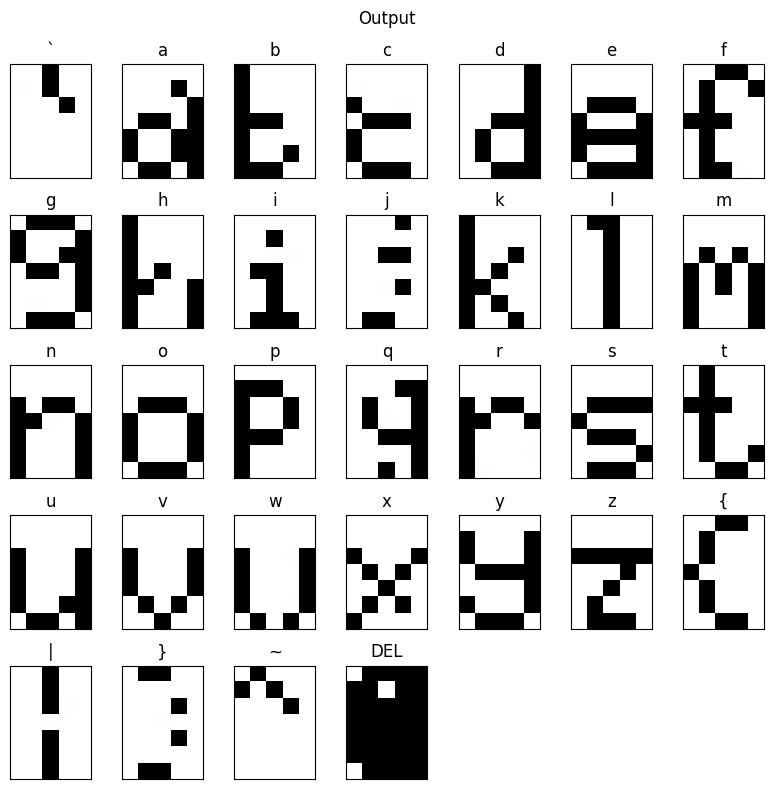

Error count: 22


In [128]:
characters = list(bitmap_dict.keys())
print(characters)

epochs = 15000
error_count = 0
autoencoder = autoencoder_architecture1()
error = train(autoencoder, mse, mse_derivative, X, X, epochs=epochs, verbose=False)
print(f"Trained for {epochs} epochs. Error: {error[-1]}")

latent_spaces = []
raw_latent_spaces = []
input_matrix_list = []
output_matrix_list = []
correct = 0

for character in range(len(characters)):
    input_bitmap = []
    output_bitmap = []

    # X is a list of lists of -lists with a single element-
    for i in range(len(X[character])):
        input_bitmap.append(X[character][i][0])
    input_matrix_list.append(bitmap_as_matrix(input_bitmap))

    # The latent space is the output of "layer 8"
    outputs, raw_latent_space = predict_with_layer_value(autoencoder, X[character], 6)
    raw_latent_spaces.append(raw_latent_space)
    latent_spaces.append((raw_latent_space[0][0], raw_latent_space[1][0]))

    for output in outputs:
        output_bitmap.append(output[0])

    if not compare_bitmaps(input_bitmap, output_bitmap, characters[character]):
        print(f"Error in the reconstruction of character '{characters[character]}'")
    else:
        correct += 1
    
    output_matrix_list.append(bitmap_as_matrix(output_bitmap))

plot_bitmap_matrix_2(input_matrix_list, characters, "Input")
plot_bitmap_matrix_2(output_matrix_list, characters, "Output")
print(f"Error count: {error_count}")

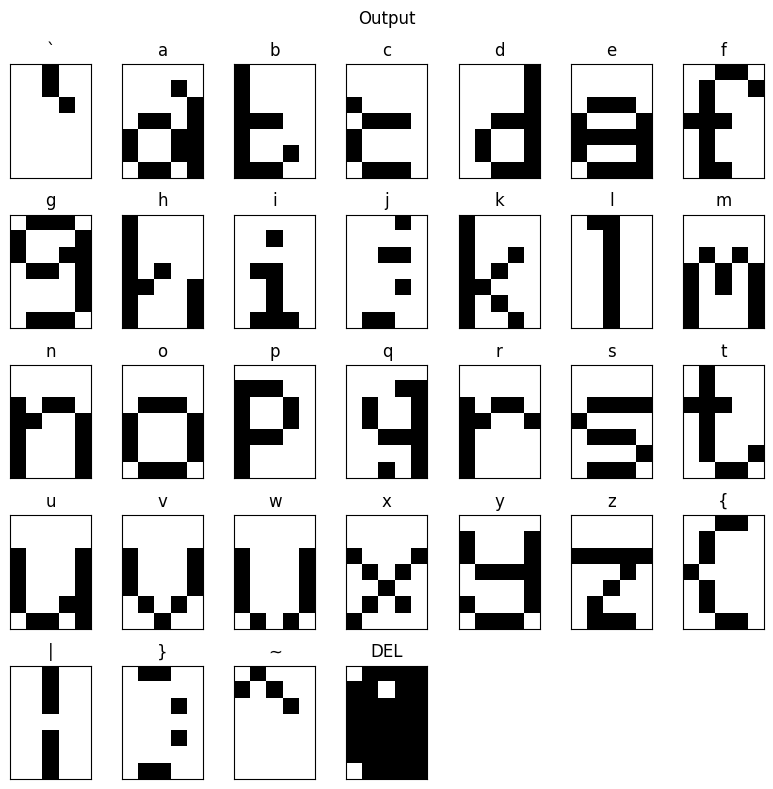

In [129]:
plot_bitmap_matrix_2(np.round(output_matrix_list), characters, "Output")

In [130]:
# Extract decoder half from autoencoder
decoder_index = round(len(autoencoder)/2)
decoder = autoencoder[decoder_index:]
print(decoder)

[<MultiLayerPerceptron.Dense object at 0x73c4ee6badd0>, <activation_functions.Sigmoid object at 0x73c4ee6bb850>, <MultiLayerPerceptron.Dense object at 0x73c4ee6b9930>, <activation_functions.Sigmoid object at 0x73c4ee6b9030>, <MultiLayerPerceptron.Dense object at 0x73c4ee6b8c70>, <activation_functions.Sigmoid object at 0x73c4ee6b86d0>]


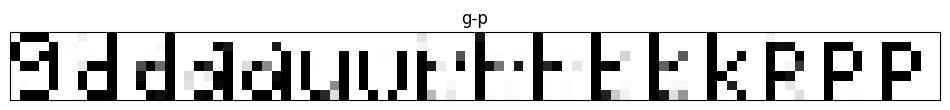

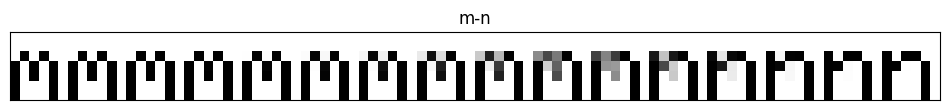

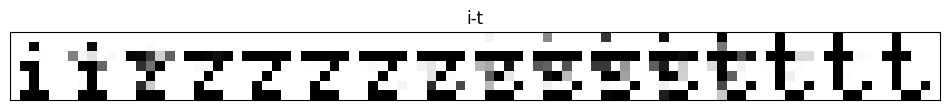

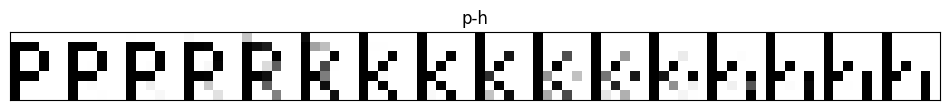

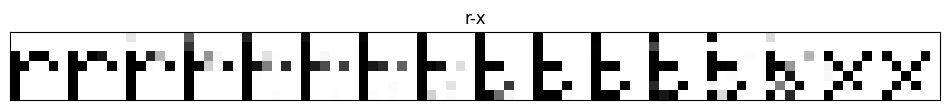

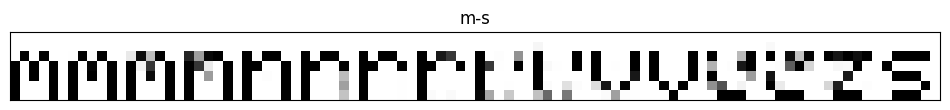

In [171]:
height = 7
width = 5

# g to p 7 16
# m to n
# 9 to 20

from_indexes = [7,13,9,16,18,13] # e
to_indexes = [16,14,20,8,24,19] # u

new_latent_spaces = []
n = 16
for c in range(len(from_indexes)):
    images = np.zeros((height, width * n + n))
    from_value = raw_latent_spaces[from_indexes[c]]
    to_value = raw_latent_spaces[to_indexes[c]]
    zero_columns = 0
    for i in range(n):
            z = (from_value * (n - 1 - i) + to_value * i) / (n - 1)
            output = predict(decoder, z)
            output = output.reshape(height, width)
            images[:, i * width + zero_columns:(i + 1) * width + zero_columns] = output
            images[:, (i + 1) * width + zero_columns] = np.zeros(height)
            zero_columns += 1
    
    plt.figure(figsize=(12, 8))
    plt.title(f"{characters[from_indexes[c]]}"
                f"-{characters[to_indexes[c]]}")
    plt.imshow(images, cmap='binary', interpolation='none', vmin=0, vmax=1)
    plt.xticks([])
    plt.yticks([])
    plt.show()

    

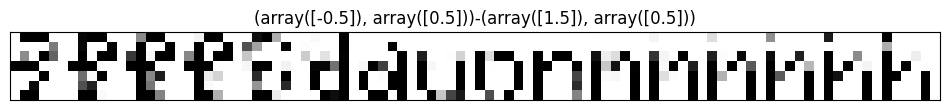

In [176]:
height = 7
width = 5

new_latent_spaces = []
n = 16
images = np.zeros((height, width * n + n))
from_value = np.array([[-0.5], [0.5]])
to_value = np.array([[1.5], [0.5]])
zero_columns = 0
for i in range(n):
        z = (from_value * (n - 1 - i) + to_value * i) / (n - 1)
        output = predict(decoder, z)
        output = output.reshape(height, width)
        images[:, i * width + zero_columns:(i + 1) * width + zero_columns] = output
        images[:, (i + 1) * width + zero_columns] = np.zeros(height)
        zero_columns += 1

plt.figure(figsize=(12, 8))
plt.imshow(images, cmap='binary', interpolation='none', vmin=0, vmax=1)
plt.title(f"{from_value[0],from_value[1]}-{to_value[0],to_value[1]}")
plt.xticks([])
plt.yticks([])
plt.show()

    

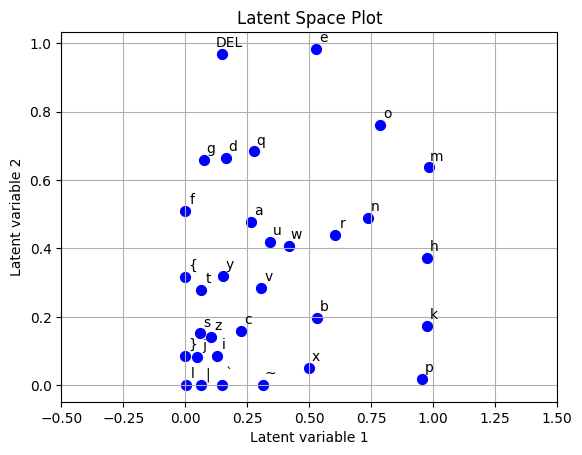

In [178]:
def plot_latent_spaces2(latent_space, characters):
    # Convert the list of tuples and labels into a Pandas DataFrame
    df = pd.DataFrame({'x': [p[0] for p in latent_space], 'y': [p[1] for p in latent_space], 'label': characters})

    # Plot the points using Pandas
    ax = df.plot.scatter(x='x', y='y', color='blue', marker='o', s=50)

    # Annotate each point with its corresponding label
    for i, row in df.iterrows():
        ax.annotate(row['label'], (row['x'], row['y']), textcoords="offset points", xytext=(5,5), ha='center')

    # Configure labels and title
    ax.set_xlabel('Latent variable 1')
    ax.set_ylabel('Latent variable 2')
    ax.set_title('Latent Space Plot')

    # Show the plot
    plt.grid()
    plt.xlim(-0.5, 1.5)
    plt.show()
plot_latent_spaces2(latent_spaces, characters)

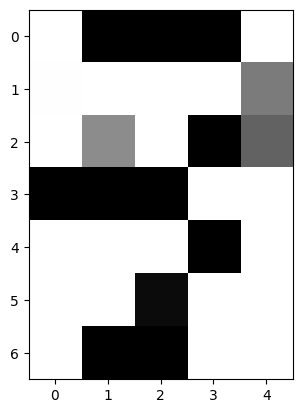

In [192]:
plt.imshow(images[:, :5], cmap='gray_r')